In [1]:
import pandas as pd
data=pd.read_csv("creditcard.csv")
X = data.iloc[:,1:30]
y = data.iloc[:,30:31]

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

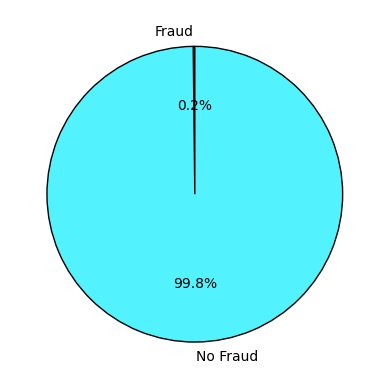

In [10]:
import matplotlib.pyplot as plt
nofraud = (len(data[data['Class'] == 1])/len(data))*100
fraud =(len(data[data['Class'] == 0])/len(data))*100
fraud_percentage = [nofraud,fraud]
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = ['#FFCCAA','#52F2FF'],
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.show()
# le pourcentage de transaction fraudileuse enorme par rapport au non fraudileuse donc notre on risque trop d'avoir la sur charge

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units = 29, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
model.add(Dropout(0.7))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
14241/14241 [==============================] - 23s 2ms/step - loss: 0.0112 - accuracy: 0.9982
Epoch 2/10
14241/14241 [==============================] - 30s 2ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 3/10
14241/14241 [==============================] - 28s 2ms/step - loss: 0.0065 - accuracy: 0.9983
Epoch 4/10
14241/14241 [==============================] - 25s 2ms/step - loss: 0.0062 - accuracy: 0.9983
Epoch 5/10
14241/14241 [==============================] - 25s 2ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 6/10
14241/14241 [==============================] - 32s 2ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 7/10
14241/14241 [==============================] - 28s 2ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 8/10
14241/14241 [==============================] - 26s 2ms/step - loss: 0.0067 - accuracy: 0.9987
Epoch 9/10
14241/14241 [==============================] - 25s 2ms/step - loss: 0.0057 - accuracy: 0.9992
Epoch 10/10
14241/14241 [==============================

In [6]:
model.save('resources/frauddetection.h5')
